In [91]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [92]:
titanic_df = pd.read_csv('train.csv')

In [93]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Get overall info

In [94]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Some insights we would like to obtain from the data:
    1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
    2.) What deck were the passengers on and how does that relate to their class?
    3.) Where did the passengers come from?
    4.) Who was alone and who was with family?
    5.) What factors helped someone survive the sinking?

# 1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)

First, check gender

In [95]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

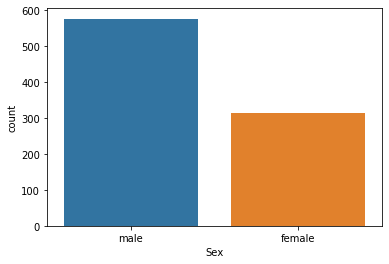

In [96]:
sns.countplot(x="Sex", data = titanic_df)

Separate the genders by classes!

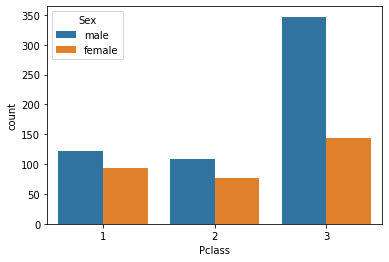

In [97]:
sns.countplot(x='Pclass',data=titanic_df,hue='Sex')

Quite a few more males in the 3rd class than females.
However, it might be useful to know the split between males,females,and children.

In [98]:
# We'll treat anyone as under 16 as a child, and then use the apply technique with a function to create a new column
# First let's make a function to sort through the sex 

def male_female_child(passenger):
    #Take the age and sex
    age, sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex
    
#define a new column called 'person'
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child, axis=1)

In [99]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


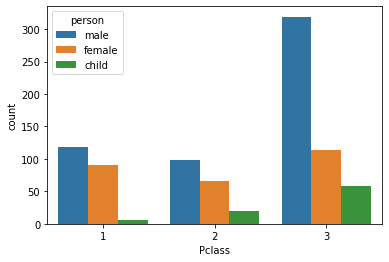

In [100]:
sns.countplot(x = 'Pclass', data = titanic_df, hue = 'person')

Quite a bit of children in 3rd class and not so many in 1st! 
Create a distribution of the ages to get a more precise picture of the who the passengers were.

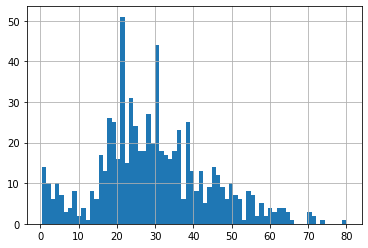

In [101]:
titanic_df['Age'].hist(bins = 70)

In [102]:
#get a quick overall comparison of male,female,child
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

# Visualize with KDE plots

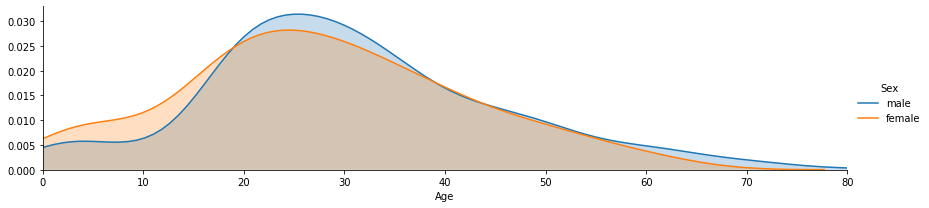

In [41]:
# Another way to visualize the data is to use FacetGrid to plot multiple kdeplots on one plot

# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
fig = sns.FacetGrid(titanic_df, hue="Sex",aspect=4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age',shade= True)

# Set the x max limit by the oldest passenger
oldest = titanic_df['Age'].max()

#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))

#Finally add a legend
fig.add_legend()

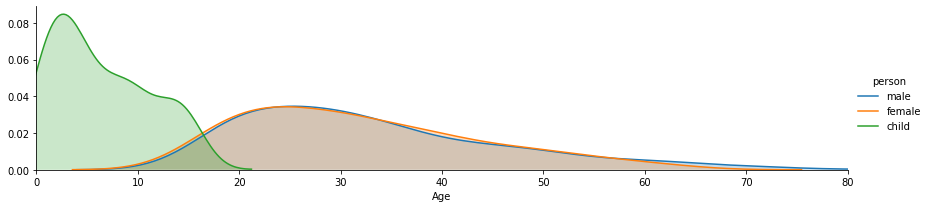

In [42]:
# We could have done the same thing for the 'person' column to include children:
fig = sns.FacetGrid(titanic_df, hue='person', aspect = 4)
fig.map(sns.kdeplot,'Age', shade = True)
oldest = titanic_df['Age'].max()
fig.set(xlim = (0, oldest))
fig.add_legend()

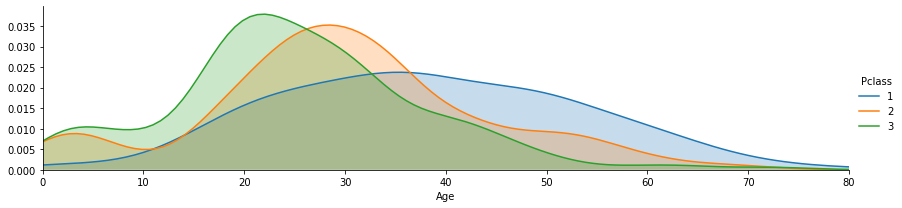

In [44]:
# Let's do the same for class by changing the hue argument:
fig = sns.FacetGrid(titanic_df, hue = 'Pclass', aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)
oldest = titanic_df['Age'].max()
fig.set(xlim = (0, oldest))
fig.add_legend()

# 2. What deck were the passengers on and how does that relate to their class?

In [45]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [47]:
#the Cabin column has information on the deck, but it has several NaN values, so we'll have to drop them.
deck = titanic_df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [57]:
#we only need the first letter of the deck to classify its level (e.g. A,B,C,D,E,F,G)
#let's grab that letter for the deck level with a simple for loop
levels = []
for level in deck:
    levels.append(level[0])

In [50]:
cabin_df = DataFrame(levels)
cabin_df.head()

,0
0,C
1,C
2,E
3,G
4,C


In [52]:
cabin_df.columns = ['Cabin']

In [53]:
cabin_df.head()

,Cabin
0,C
1,C
2,E
3,G
4,C


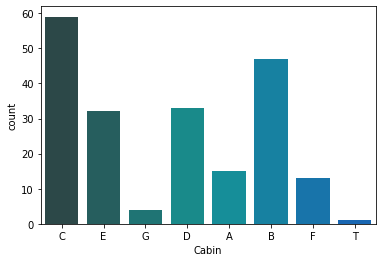

In [54]:
sns.countplot('Cabin', data=cabin_df, palette = 'winter_d')

In [55]:
#Interesting to note we have a 'T' deck value there which doesn't make sense, we can drop it out 
cabin_df = cabin_df[cabin_df.Cabin != 'T']

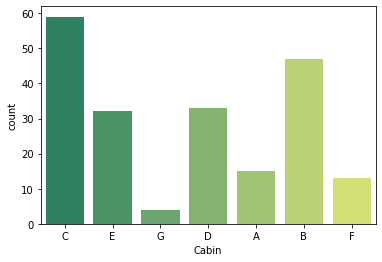

In [56]:
sns.countplot('Cabin', data = cabin_df, palette = 'summer')

# 3.) Where did the passengers come from?

the Embarked column has C,Q,and S values. These stand for Cherbourg, Queenstown, Southhampton.

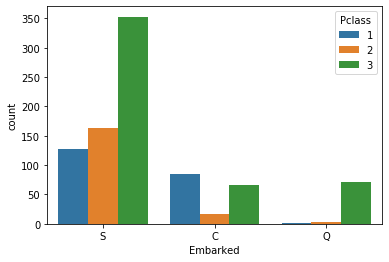

In [103]:
 # Now we can make a quick plot to check out the results
sns.countplot('Embarked',data=titanic_df,hue='Pclass')

An interesting find here is that in Queenstown, almost all the passengers that boarded there were 3rd class. 

# 4.) Who was alone and who was with family?

In [61]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [104]:
#Adding a new column to define alone
titanic_df['alone'] = titanic_df.SibSp + titanic_df['Parch']

In [105]:
titanic_df['alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: alone, Length: 891, dtype: int64

If the Alone column is anything but 0, then the passenger had family aboard and wasn't alone. 
So let's change the column now so that if the value is greater than 0, 
we know the passenger was with his/her family, otherwise they were alone.

In [64]:
titanic_df['alone'].loc[titanic_df['alone'] > 0] = 'with family'
titanic_df['alone'].loc[titanic_df['alone'] == 0] = 'alone'

C:\Users\mariu\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [65]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,alone


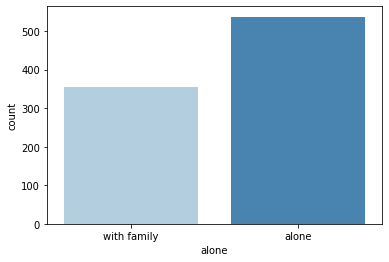

In [66]:
sns.countplot('alone', data = titanic_df, palette = 'Blues')

# What factors helped someone survive the sinking?

1. Create a new column for legibility purposes through mapping

In [67]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,alone


In [108]:
titanic_df['Survivor'] = titanic_df['Survived'].map({0:'no',1:'yes'})

In [109]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0,no


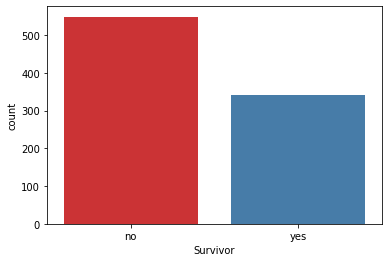

In [110]:
sns.countplot('Survivor', data=titanic_df, palette='Set1')

So quite a few more people died than those who survived. Let's see if the class of the passengers had an effect on their survival rate.

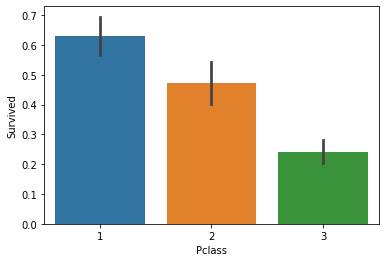

In [111]:
sns.barplot('Pclass','Survived', data=titanic_df)

Look like survival rates for the 3rd class are substantially lower! But maybe this effect is being caused by the large amount of men in the 3rd class in combination with the women and children first policy. Let's use 'hue' to get a clearer picture on this.

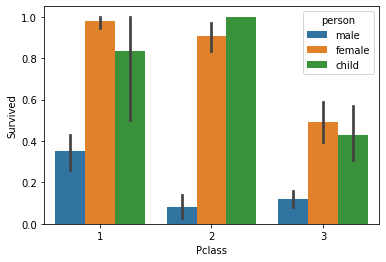

In [74]:
sns.barplot('Pclass','Survived', data = titanic_df, hue = 'person')

From this data it looks like being a male or being in 3rd class were both not favourable for survival. Even regardless of class the result of being a male in any class dramatically decreases your chances of survival.

But what about age? Did being younger or older have an effect on survival rate?

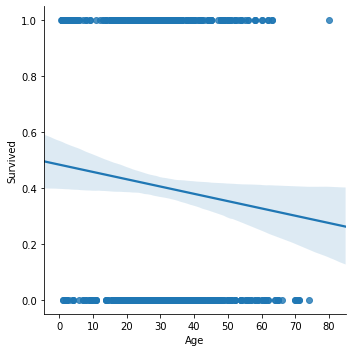

In [75]:
# Let's use a linear plot on age versus survival
sns.lmplot('Age','Survived', data = titanic_df)

Looks like there is a general trend that the older the passenger was, the less likely they survived. Let's go ahead and use hue to take a look at the effect of class and age.

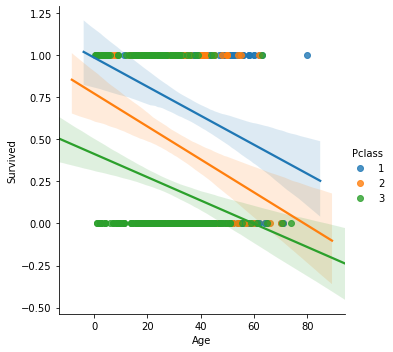

In [78]:
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df)

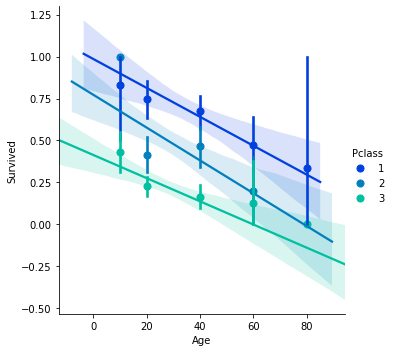

In [79]:
#We can also use the x_bin argument to clean up this figure and grab the data and bin it by age with a std attached!
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter',x_bins=generations)

Interesting find on the older 1st class passengers! What about if we relate gender and age with the survival set?

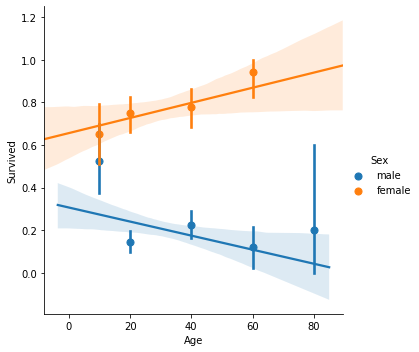

In [80]:
sns.lmplot('Age','Survived',hue='Sex', data = titanic_df, x_bins = generations)

# Did the deck have an effect on the passengers survival rate? 

In [81]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,alone,no


In [83]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[0]

In [85]:
titanic_df['Cabin'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [88]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,female,with family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,female,with family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,alone,no


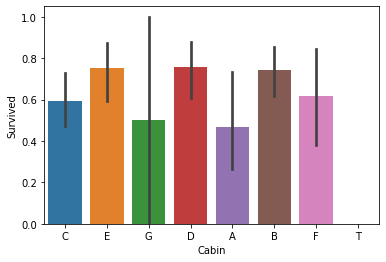

In [87]:
sns.barplot('Cabin', 'Survived', data = titanic_df)

# Did having a family member increase the odds of surviving the crash?

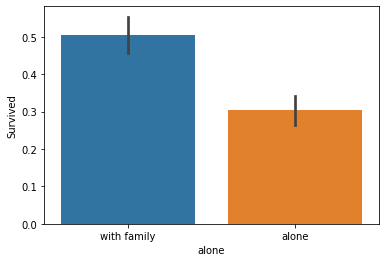

In [90]:
sns.barplot('alone','Survived', data = titanic_df)